### PS4 
### Name: Yangyang Dai

In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

#### 1. Discrete approximation of an AR(1) process (10 points).

In [2]:
mu = 11.4
rho = 0.85
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

##### (a)  Plot the first 100 observations of the resulting simulated time series

In [3]:
z_vec = np.empty(T)
for i in range(T):
    if i == 0:
        z = rho
    else:
        z = rho*z_vec[i-1] + (1-rho)*mu + eps_vec[i]   
    z_vec[i] = z
z_orig_vec = z_vec

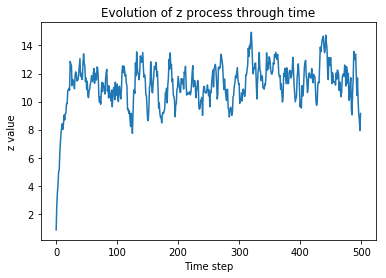

In [4]:
plt.plot(np.arange(T), z_vec)
plt.xlabel('Time step')
plt.ylabel('z value')
plt.title('Evolution of z process through time')
plt.show()

##### (b) Create a 5-element vector 

In [5]:
z_vals = np.array( [mu-3*sigma + 1.5*sigma*x for x in range(5)] )
assert z_vals[2] == 11.4
print("z_vals vector = ", z_vals)

z_vals vector =  [ 9.3  10.35 11.4  12.45 13.5 ]


##### (c) Estimate the probabilities of a 5 × 5 Markov transition matrix 

In [6]:
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]
print(z_cuts)

[ 9.825 10.875 11.925 12.975]


In [7]:
# bin the z process. Given python indexes at 0, use bins numbered 0,1,2,3,4
z_bins = np.empty(T)

for i in range(T):
    if z_vec[i] <= z_cuts[0]:
        z_bins[i] = 0
    
    elif z_vec[i] <= z_cuts[1]:
        z_bins[i] = 1
    
    elif z_vec[i] <= z_cuts[2]:
        z_bins[i] = 2
        
    elif z_vec[i] <= z_cuts[3]:
        z_bins[i] = 3
        
    else:
        z_bins[i] = 4

In [8]:
# Create a count matrix which we can then normalize to create transition matrix
trans_counts = np.full((5,5), 0)

for i in range(T):
    cur_bin = int(z_bins[i])
    if i == 0:
        continue
    assert i >= 1
    
    prev_bin = int(z_bins[i-1])
    trans_counts[prev_bin][cur_bin] += 1

assert np.sum(trans_counts) == T-1

In [9]:
# Now normalize the transition count matrix to estimate the transition matrix
P_hat = trans_counts / ( trans_counts.sum(axis=1).reshape(5,1) )
print("Empirical transition matrix is: \n\n", P_hat)

Empirical transition matrix is: 

 [[0.75757576 0.21212121 0.03030303 0.         0.        ]
 [0.09821429 0.51785714 0.33928571 0.04464286 0.        ]
 [0.03184713 0.22292994 0.47770701 0.23566879 0.03184713]
 [0.         0.04273504 0.34188034 0.5042735  0.11111111]
 [0.         0.         0.04255319 0.34042553 0.61702128]]


##### (d) the probability of zt+3 being in bin 5 given that zt is in bin 3 

In [13]:
import numpy.linalg as LA
init_state = np.array([0, 0, 1, 0, 0]).reshape(5,1)
prob_two_steps = LA.matrix_power(P_hat.T, 2) @ init_state
print("The Probability of going from state 3 to state 5 over 2 steps is: ", prob_two_steps[4])

The Probability of going from state 3 to state 5 over 2 steps is:  [0.06104938]


##### (e) the stationary (long-run, ergodic) distribution of zt

In [14]:
# Let's iteratively left-multiply by P_hat until convergence
# Define convergence to be when applying P_hat doesn't change the resulting vector 
# by more than some tolerance level, with respect to the L2-Euclidean norm
cur_state = np.array([0, 0, 1, 0, 0]).reshape(5,1)
tolerance = 0.00001
change = 1
iters = 0

while change > tolerance:
    next_state = P_hat.T @ cur_state 
    change = LA.norm(next_state - cur_state)
    
    cur_state = next_state
    iters += 1
    
print("After {} time-steps state dist converges to:\n".format(iters), next_state)
print("\n tolerance = ", tolerance)

After 34 time-steps state dist converges to:
 [[0.13224274]
 [0.224439  ]
 [0.31463475]
 [0.23448444]
 [0.09419908]]

 tolerance =  1e-05


##### (f) simulate a time series of T values of the discretized version of zt ∈ z vals using the estimated transition matrix

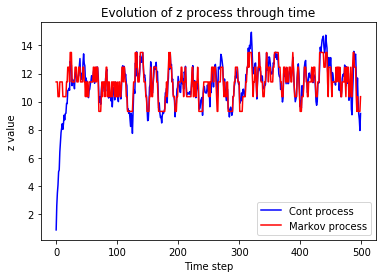

In [15]:
disc_z = np.empty(T)
z_0 = z_vals[2]
z_vec = np.empty(T)
z_t = z_0
zt_ind = 1
for t_ind in range(T):
    ztp1_ind = np.argwhere(unif_vec[t_ind] <= np.cumsum(P_hat[zt_ind, :])).min()
    
    z_tp1 = z_vals[ztp1_ind]
    z_vec[t_ind] = z_tp1
    
    z_t = z_tp1
    zt_ind = ztp1_ind

plt.plot(np.arange(T), z_orig_vec, color='b', label='Cont process')
plt.plot(np.arange(T), z_vec, color='r', label='Markov process')
plt.xlabel('Time step')
plt.ylabel('z value')
plt.title('Evolution of z process through time')
plt.legend()
plt.show()